# 1.2.4 建模和评估

## statsmodels

> `statsmodels' 是用于数据检索、估计模型，并运行统计检验的包。

```Python
conda install statsmodelst
```

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [22]:
f_name = os.path.join("./data/", "iris.data")
df = pd.read_csv(f_name, names=["sepal length", "sepal width", "petal length", "petal width", "class"])

### 使用 statsmodels 来构建一个线性回归模型

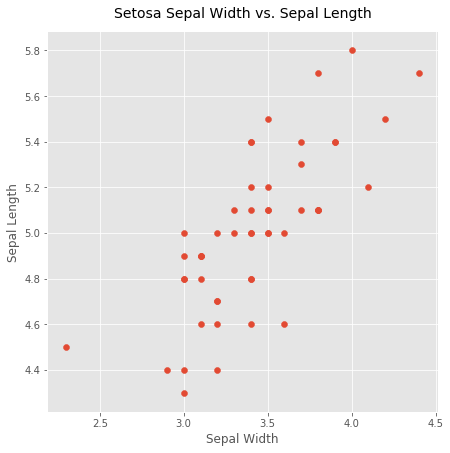

In [23]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(df["sepal width"][:50], df["sepal length"][:50])
ax.set_ylabel("Sepal Length")
ax.set_xlabel("Sepal Width")
ax.set_title("Setosa Sepal Width vs. Sepal Length", fontsize=14, y=1.02)

In [24]:
import statsmodels.api as sm

y = df["sepal length"][:50]
x = df["sepal width"][:50]
X = sm.add_constant(x)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           4.75e-10
Time:                        10:17:44   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

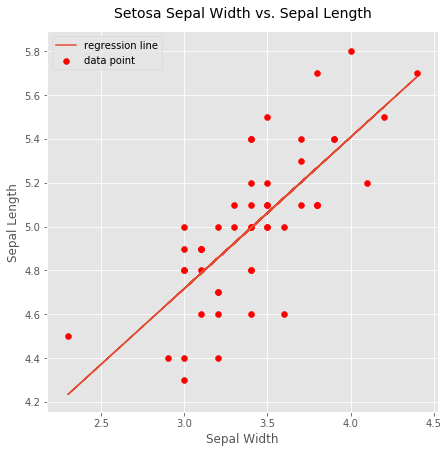

In [25]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend(loc=2)

## scikit-learn

* 作者们为其设计了无与伦比的文档，为几十个算法提供了统一的API接口
* 它建立在 Python 科学栈的核心模块之上，也就是 Scipy, pandas, matplotlib
* scikit-learn 覆盖的一些领域包括：分类、回归、聚类、降维、模型选择和预处理

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

clf = RandomForestClassifier(max_depth=5, n_estimators=10)

X = df.ix[:, :4]
y = df.ix[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=["predicted", "actual"])
rf["correct"] = rf.apply(lambda r: 1 if r["predicted"] == r["actual"] else 0, axis=1)
rf

predicted           actual  correct
0   Iris-versicolor   Iris-virginica        0
1    Iris-virginica   Iris-virginica        1
2       Iris-setosa      Iris-setosa        1
3       Iris-setosa      Iris-setosa        1
4       Iris-setosa      Iris-setosa        1
5       Iris-setosa      Iris-setosa        1
6   Iris-versicolor  Iris-versicolor        1
7   Iris-versicolor  Iris-versicolor        1
8   Iris-versicolor  Iris-versicolor        1
9    Iris-virginica   Iris-virginica        1
10  Iris-versicolor  Iris-versicolor        1
11      Iris-setosa      Iris-setosa        1
12   Iris-virginica   Iris-virginica        1
13   Iris-virginica   Iris-virginica        1
14      Iris-setosa      Iris-setosa        1
15  Iris-versicolor  Iris-versicolor        1
16  Iris-versicolor   Iris-virginica        0
17  Iris-versicolor  Iris-versicolor        1
18      Iris-setosa      Iris-setosa        1
19  Iris-versicolor  Iris-versicolor        1
20  Iris-versicolor  Iris-versicolor        1
21      Iris-setosa      Iris-setosa        1
22      Iris-setosa      Iris-setosa        1
23      Iris-setosa      Iris-setosa        1
24   Iris-virginica   Iris-virginica        1
25      Iris-setosa      Iris-setosa        1
26   Iris-virginica   Iris-virginica        1
27  Iris-versicolor  Iris-versicolor        1
28      Iris-setosa      Iris-setosa        1
29   Iris-virginica   Iris-virginica        1
30   Iris-virginica   Iris-virginica        1
31   Iris-virginica   Iris-virginica        1
32   Iris-virginica   Iris-virginica        1
33  Iris-versicolor  Iris-versicolor        1
34      Iris-setosa      Iris-setosa        1
35  Iris-versicolor  Iris-versicolor        1
36  Iris-versicolor   Iris-virginica        0
37      Iris-setosa      Iris-setosa        1
38      Iris-setosa      Iris-setosa        1
39   Iris-virginica   Iris-virginica        1
40      Iris-setosa      Iris-setosa        1
41   Iris-virginica   Iris-virginica        1
42   Iris-virginica   Iris-virginica        1
43  Iris-versicolor  Iris-versicolor        1
44  Iris-versicolor  Iris-versicolor        1

In [45]:
rf["correct"].sum() / rf["correct"].count()

0.93333333333333335

([<matplotlib.axis.XTick at 0x1206482b0>,
 <a list of 4 Text xticklabel objects>)

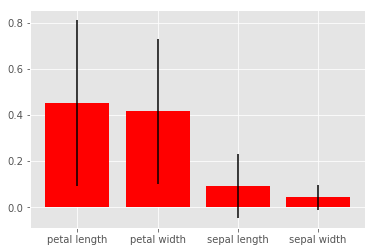

In [54]:
f_importances = clf.feature_importances_
f_names = df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]
plt.bar(range(len(f_importances)), imps, color="r", yerr=errs, align="center")
plt.xticks(range(len(f_importances)), labels)

### svm

In [63]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

clf = OneVsRestClassifier(SVC(kernel="linear"))

X = df.ix[:, :4]
y = np.array(df.ix[:, 4]).astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=["predicted", "actual"])
rf["correct"] = rf.apply(lambda r: 1 if r["predicted"] == r["actual"] else 0, axis=1)
rf

predicted           actual  correct
0    Iris-virginica   Iris-virginica        1
1    Iris-virginica   Iris-virginica        1
2   Iris-versicolor      Iris-setosa        0
3       Iris-setosa      Iris-setosa        1
4   Iris-versicolor  Iris-versicolor        1
5    Iris-virginica   Iris-virginica        1
6       Iris-setosa      Iris-setosa        1
7   Iris-versicolor  Iris-versicolor        1
8   Iris-versicolor  Iris-versicolor        1
9   Iris-versicolor  Iris-versicolor        1
10      Iris-setosa      Iris-setosa        1
11      Iris-setosa      Iris-setosa        1
12   Iris-virginica  Iris-versicolor        0
13   Iris-virginica   Iris-virginica        1
14  Iris-versicolor   Iris-virginica        0
15  Iris-versicolor  Iris-versicolor        1
16   Iris-virginica   Iris-virginica        1
17  Iris-versicolor  Iris-versicolor        1
18   Iris-virginica  Iris-versicolor        0
19   Iris-virginica   Iris-virginica        1
20      Iris-setosa      Iris-setosa        1
21      Iris-setosa      Iris-setosa        1
22      Iris-setosa      Iris-setosa        1
23   Iris-virginica  Iris-versicolor        0
24  Iris-versicolor  Iris-versicolor        1
25      Iris-setosa      Iris-setosa        1
26      Iris-setosa      Iris-setosa        1
27      Iris-setosa      Iris-setosa        1
28  Iris-versicolor  Iris-versicolor        1
29   Iris-virginica   Iris-virginica        1
30  Iris-versicolor  Iris-versicolor        1
31  Iris-versicolor  Iris-versicolor        1
32  Iris-versicolor   Iris-virginica        0
33      Iris-setosa      Iris-setosa        1
34  Iris-versicolor  Iris-versicolor        1
35  Iris-versicolor  Iris-versicolor        1
36      Iris-setosa      Iris-setosa        1
37  Iris-versicolor  Iris-versicolor        1
38      Iris-setosa      Iris-setosa        1
39   Iris-virginica   Iris-virginica        1
40  Iris-versicolor  Iris-versicolor        1
41  Iris-versicolor  Iris-versicolor        1
42   Iris-virginica   Iris-virginica        1
43      Iris-setosa      Iris-setosa        1
44   Iris-virginica   Iris-virginica        1

In [65]:
rf["correct"].sum() / rf["correct"].count()

0.8666666666666667